<img src="TSF.png" align="center">

<h1 align="center">Graduate Rotational Internship Programme</h1>
<h2 align="center">The Sparks Foundation</h2>

<h3>Data Science and Machine Learning</h3>
<h3>Task-3: To Explore Unsupervised Machine Learning</h3>

<h5>Importing Requisite Libraries</h5>

In [1]:
library(tidyverse)
library(caret)
library(cluster)
library(factoextra)
library(NbClust)

Warning message:
"package 'tidyverse' was built under R version 3.6.3"-- Attaching packages --------------------------------------- tidyverse 1.3.0 --
v ggplot2 3.3.0     v purrr   0.3.4
v tibble  3.0.1     v dplyr   0.8.5
v tidyr   1.0.2     v stringr 1.4.0
v readr   1.3.1     v forcats 0.5.0
Warning message:
"package 'ggplot2' was built under R version 3.6.3"Warning message:
"package 'tibble' was built under R version 3.6.3"Warning message:
"package 'tidyr' was built under R version 3.6.3"Warning message:
"package 'readr' was built under R version 3.6.3"Warning message:
"package 'purrr' was built under R version 3.6.3"Warning message:
"package 'dplyr' was built under R version 3.6.3"Warning message:
"package 'stringr' was built under R version 3.6.3"Warning message:
"package 'forcats' was built under R version 3.6.3"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
Warning mess

<h5>Retrieving the Dataset</h5>

Retrieving the "iris" dataset from the R platform into our workspace

In [2]:
data(iris)
ir_data <- iris
head(ir_data)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa


<h5>Exploratory Data Analysis</h5>

Exploring the dataset using statistics, visualisations and other parameters

In [3]:
dim(ir_data)

[1] 150   5

In [4]:
sapply(ir_data, class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [5]:
levels(ir_data$Species)

[1] "setosa"     "versicolor" "virginica"

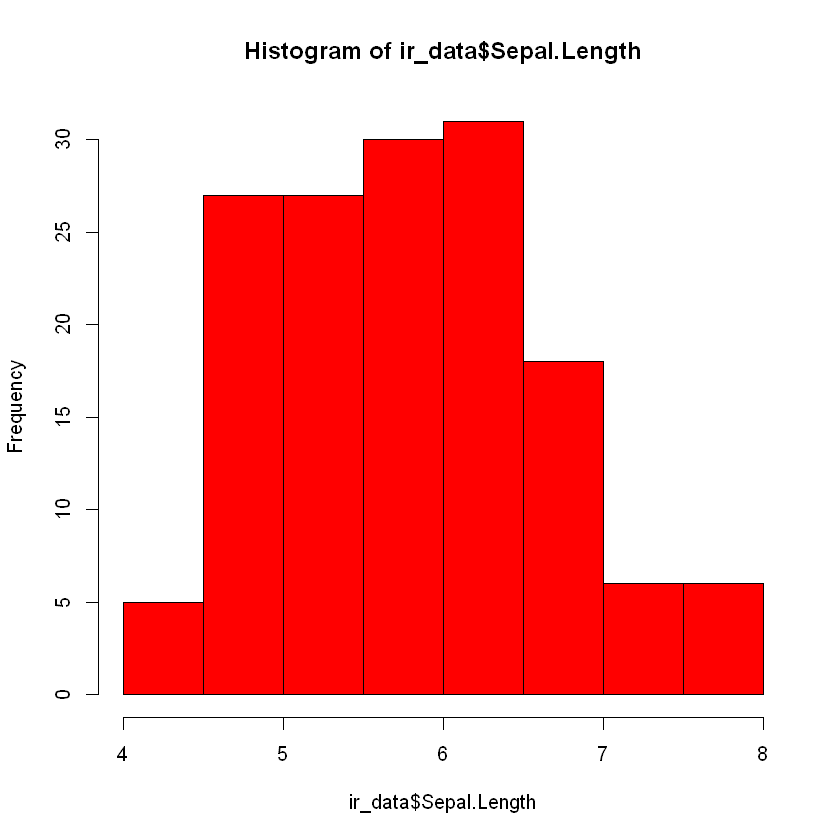

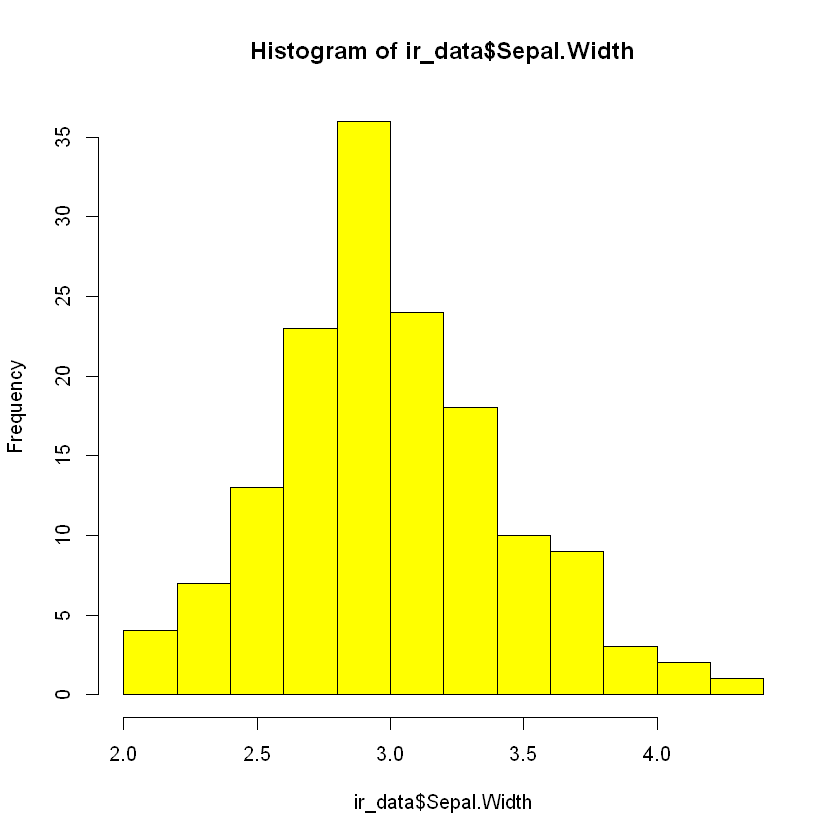

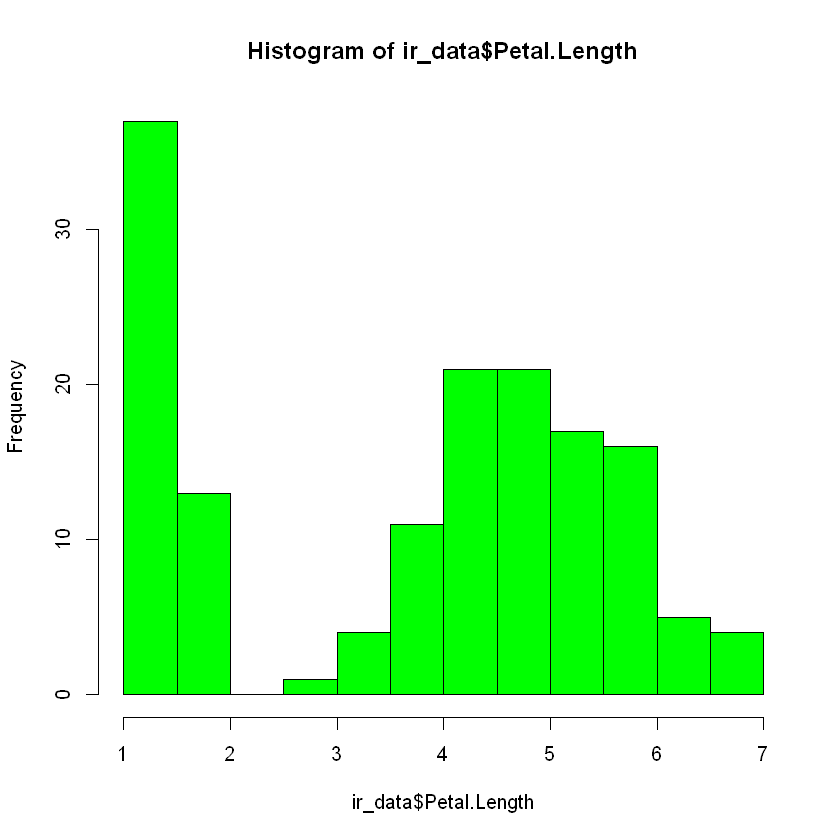

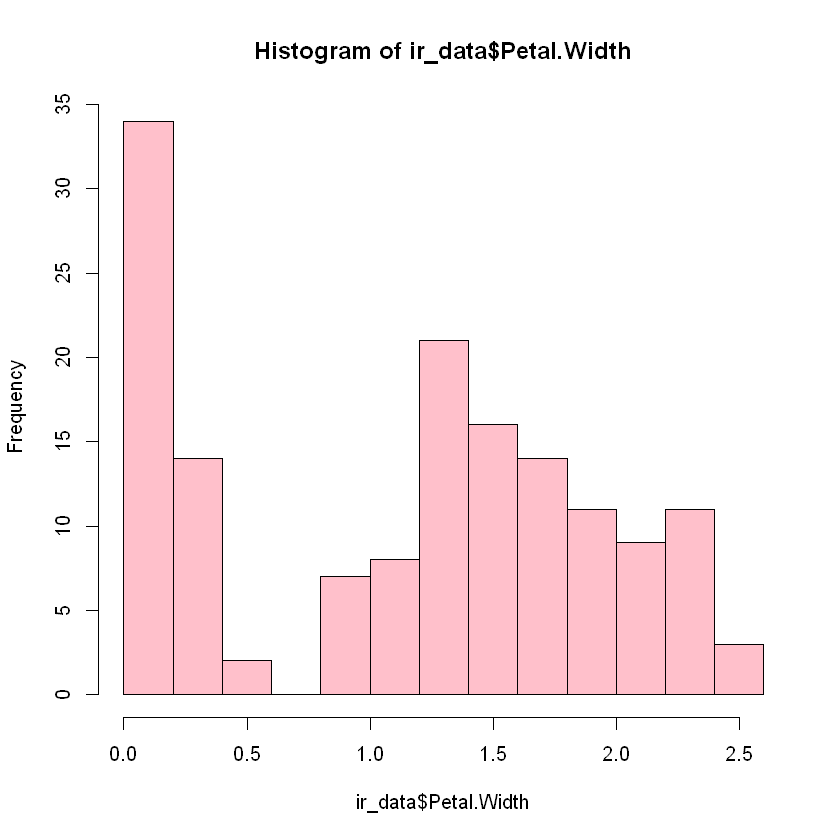

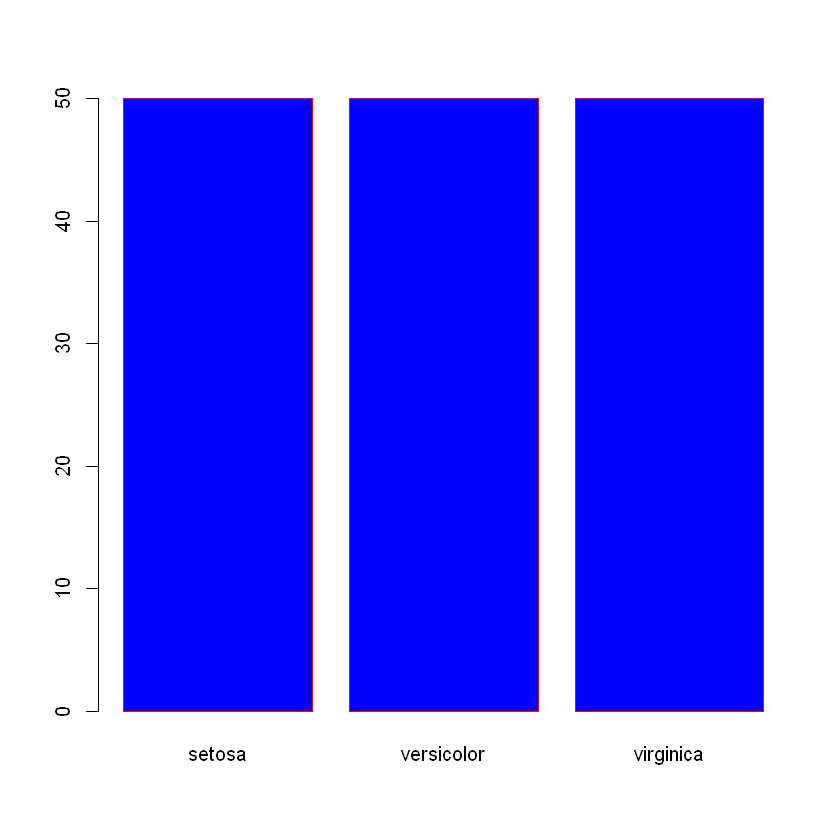

In [6]:
hist(ir_data$Sepal.Length, col='red')
hist(ir_data$Sepal.Width, col='yellow')
hist(ir_data$Petal.Length, col='green')
hist(ir_data$Petal.Width, col='pink')
barplot(table(ir_data$Species), col='blue', border='red')

In [7]:
summary(ir_data)

  Sepal.Length    Sepal.Width     Petal.Length    Petal.Width   
 Min.   :4.300   Min.   :2.000   Min.   :1.000   Min.   :0.100  
 1st Qu.:5.100   1st Qu.:2.800   1st Qu.:1.600   1st Qu.:0.300  
 Median :5.800   Median :3.000   Median :4.350   Median :1.300  
 Mean   :5.843   Mean   :3.057   Mean   :3.758   Mean   :1.199  
 3rd Qu.:6.400   3rd Qu.:3.300   3rd Qu.:5.100   3rd Qu.:1.800  
 Max.   :7.900   Max.   :4.400   Max.   :6.900   Max.   :2.500  
       Species  
 setosa    :50  
 versicolor:50  
 virginica :50  
                
                
                

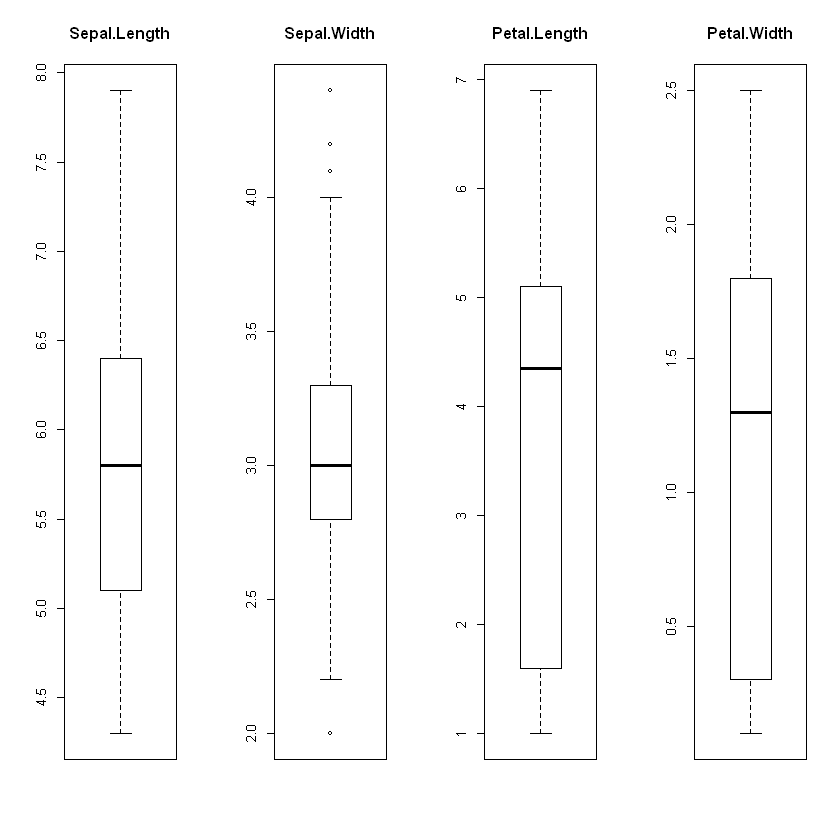

In [8]:
# boxplot for each attribute on one image
par(mfrow=c(1,4))
for(i in 1:4) {
  boxplot(ir_data[, 1:4][,i], main=names(iris)[i])
}

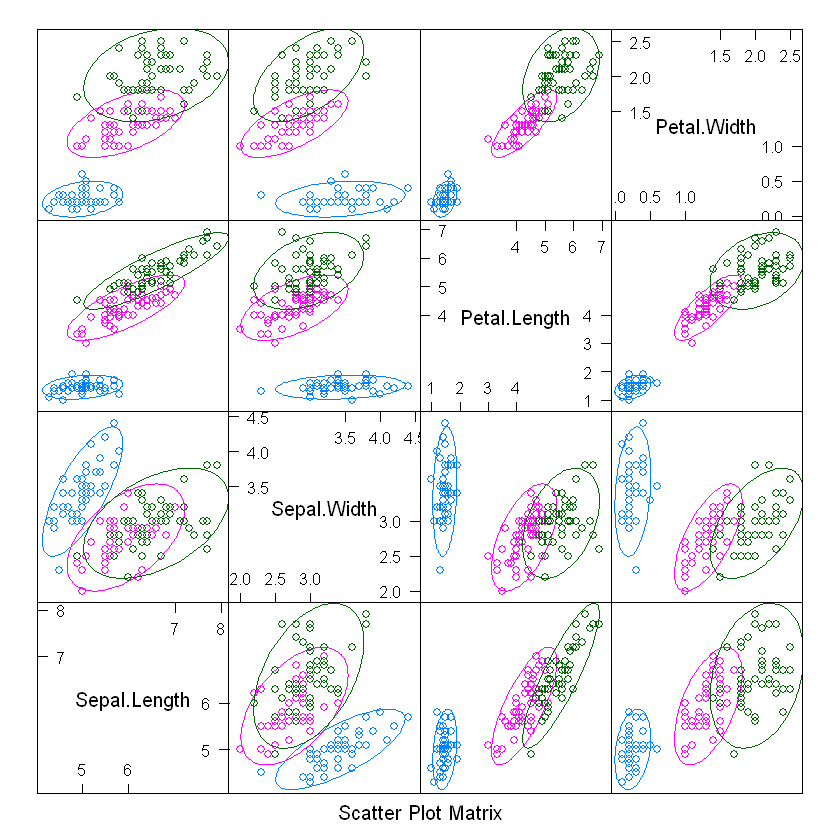

In [9]:
# scatterplot matrix
featurePlot(x=ir_data[,1:4], y=ir_data[,5], plot="ellipse")

<h5>Data Preprocessing</h5>

In [10]:
ir_data<-na.omit(ir_data)
ir_data[, 1:4] <- scale(ir_data[, 1:4])

<h5>Modelling</h5>

We use the K-Means Clustering method to find the optimum number of clusters

*** : The Hubert index is a graphical method of determining the number of clusters.
                In the plot of Hubert index, we seek a significant knee that corresponds to a 
                significant increase of the value of the measure i.e the significant peak in Hubert
                index second differences plot. 
 


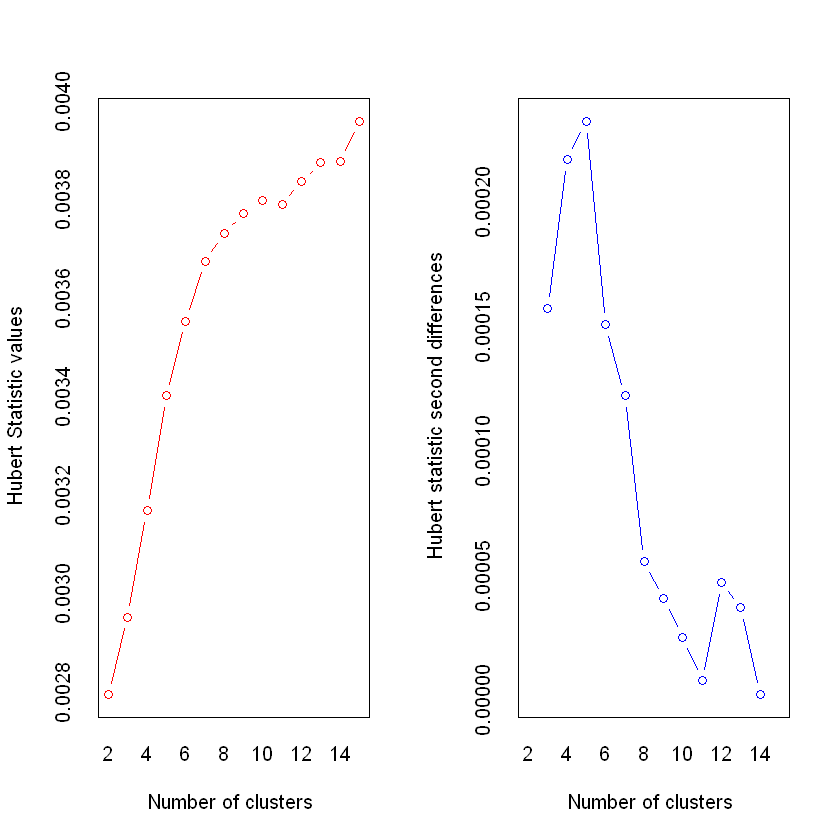

*** : The D index is a graphical method of determining the number of clusters. 
                In the plot of D index, we seek a significant knee (the significant peak in Dindex
                second differences plot) that corresponds to a significant increase of the value of
                the measure. 
 
******************************************************************* 
* Among all indices:                                                
* 10 proposed 2 as the best number of clusters 
* 6 proposed 3 as the best number of clusters 
* 1 proposed 4 as the best number of clusters 
* 1 proposed 5 as the best number of clusters 
* 3 proposed 12 as the best number of clusters 
* 1 proposed 14 as the best number of clusters 
* 2 proposed 15 as the best number of clusters 

                   ***** Conclusion *****                            
 
* According to the majority rule, the best number of clusters is  2 
 
 
******************************************************************* 


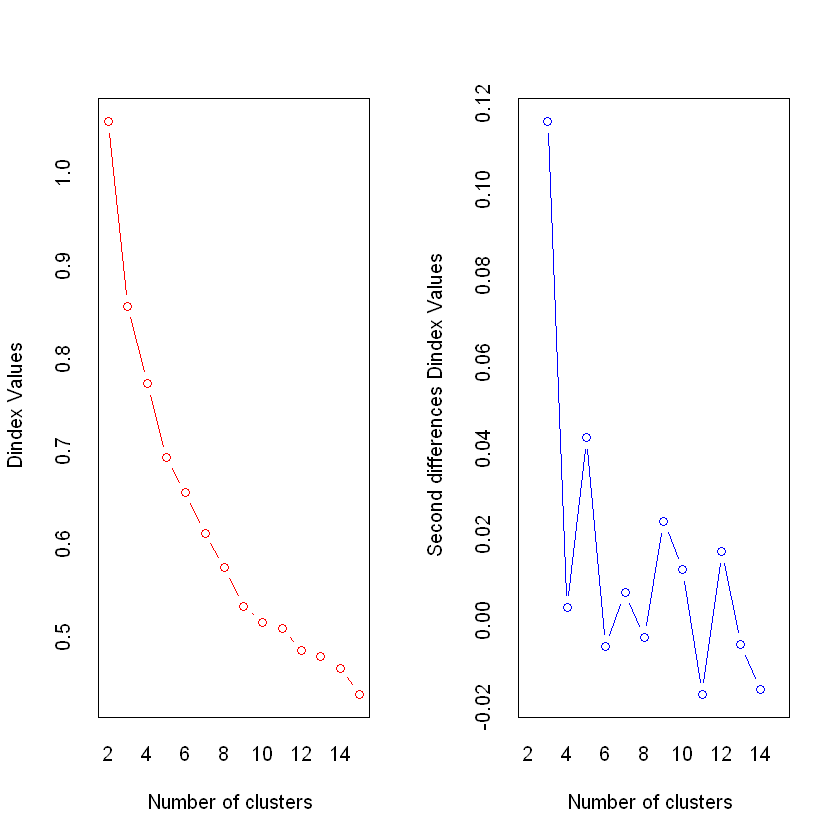

In [11]:
set.seed(1234)
nc <- NbClust(ir_data[,1:4], min.nc=2, max.nc=15, method="kmeans")


 0  2  3  4  5 12 14 15 
 2 10  6  1  1  3  1  2 

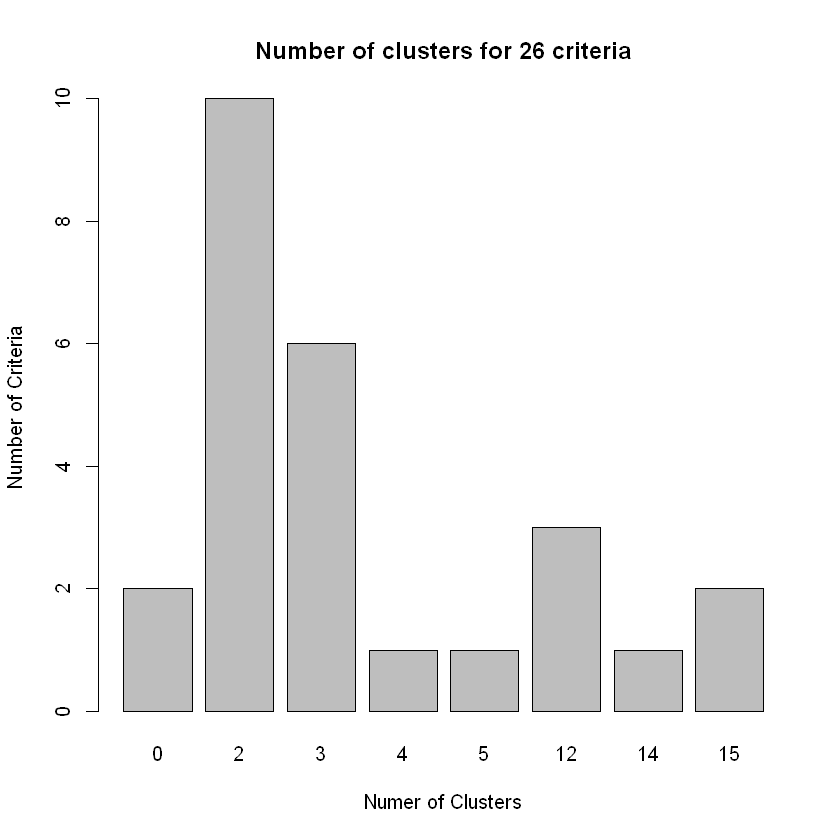

In [12]:
barplot(table(nc$Best.n[1,]),
        xlab="Numer of Clusters", ylab="Number of Criteria",
       main="Number of clusters for 26 criteria")
table(nc$Best.n[1,])

In [13]:
set.seed(1234)
fit.km <- kmeans(ir_data[, 1:4], centers=2,  nstart=25)
fit.km$size

[1]  50 100

In [14]:
table(fit.km$cluster,ir_data$Species)

   
    setosa versicolor virginica
  1     50          0         0
  2      0         50        50

<h5>Visualising the Clusters</h5>

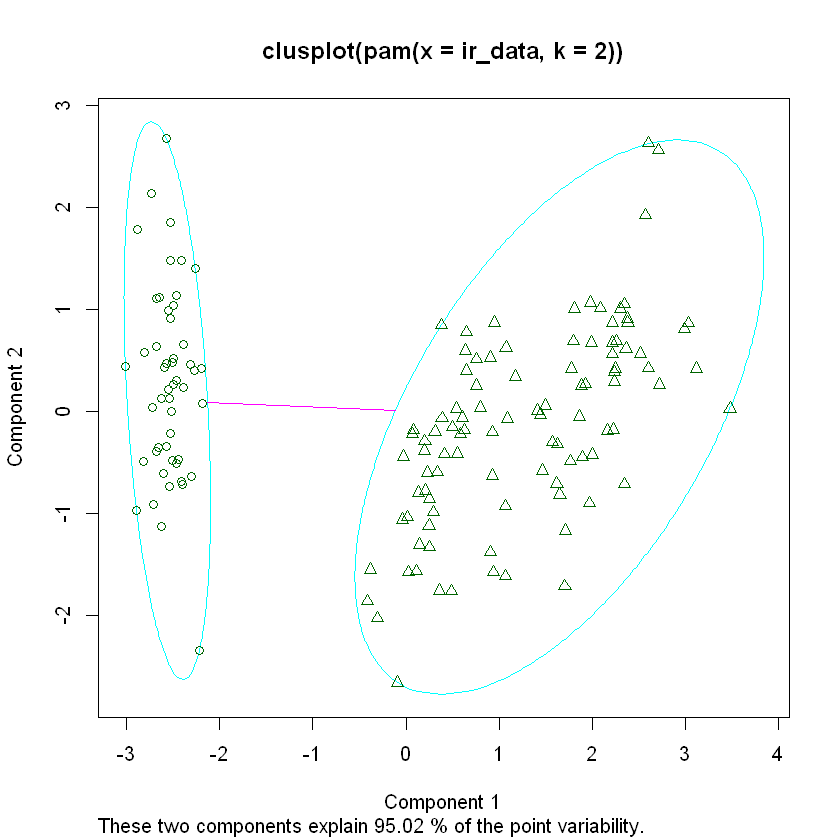

In [15]:
clusplot(pam(ir_data,2))

<h5>Final Thoughts</h5>

The best way to label the data is by dividing them into <em>2</em> clusters.